In [1]:
from sklearn.linear_model import LogisticRegression

In [2]:
from sklearn import tree

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('/Users/nicolekacirek/Desktop/USF/Fall_Module_2/Machine_Learning/msds621_election_decisons/data/final.csv')

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
for column in df.columns:
    if df[column].dtype == type(object):
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.loc[:, df.columns != 'WINNER']
y = df.WINNER

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
X_train

,STATE,RACE,S1_DEM_RATIO,S2_DEM_RATIO,S3_DEM_RATIO,S1_REP_RATIO,S2_REP_RATIO,S3_REP_RATIO,S1_COR(DD),S2_COR(DD),S3_COR(DD),S1_COR(RR),S2_COR(RR),S3_COR(RR)
24,2,0,1.076826,1.031263,1.005520,0.915275,0.938095,0.988961,0.989457,0.943501,0.971932,0.975502,0.954663,0.941709
6,1,0,1.042054,0.963116,0.971550,0.991122,1.017141,1.031267,0.913355,0.939575,0.962902,0.831735,0.871718,0.941743
0,1,0,0.932662,0.918382,0.957061,1.017849,1.043827,1.646160,0.957591,0.984190,0.973416,0.962578,0.950228,0.965918
30,3,0,1.166222,1.138143,1.065676,0.921412,0.879678,0.911478,0.836707,0.866935,0.888030,0.880581,0.894482,0.973651
16,4,0,1.080620,1.055469,1.023926,0.947302,0.912774,0.920554,0.989948,0.981566,0.967034,0.991819,0.972068,0.958175
18,4,0,1.336780,1.171020,1.052230,0.916691,0.875106,0.931545,0.984075,0.978531,0.944132,0.992314,0.984207,0.976525
45,5,0,1.049158,1.032938,1.025807,0.918066,0.927104,0.911399,0.988823,0.988112,0.913679,0.988113,0.978873,0.926131
39,3,0,1.070197,1.069136,1.023748,0.975292,0.954580,0.988266,0.728234,0.945100,0.980126,0.780794,0.948916,0.994171
28,3,0,1.107135,1.049900,1.014076,0.915364,0.906831,0.952571,0.986366,0.989845,0.976383,0.964244,0.988718,0.953349
49,5,0,1.089927,1.076452,1.045796,0.950995,0.933802,0.928983,0.987235,0.936534,0.979752,0.975862,0.950505,0.981361


In [11]:
clf = tree.DecisionTreeClassifier()

In [12]:
clf = clf.fit(X_train, y_train)

In [13]:
n_nodes = clf.tree_.node_count
n_nodes

15

In [14]:
try:
    import pydotplus
except ImportError:
    import pip
    import sys
    import subprocess
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'dit'])
    import pydotplus    

In [15]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz

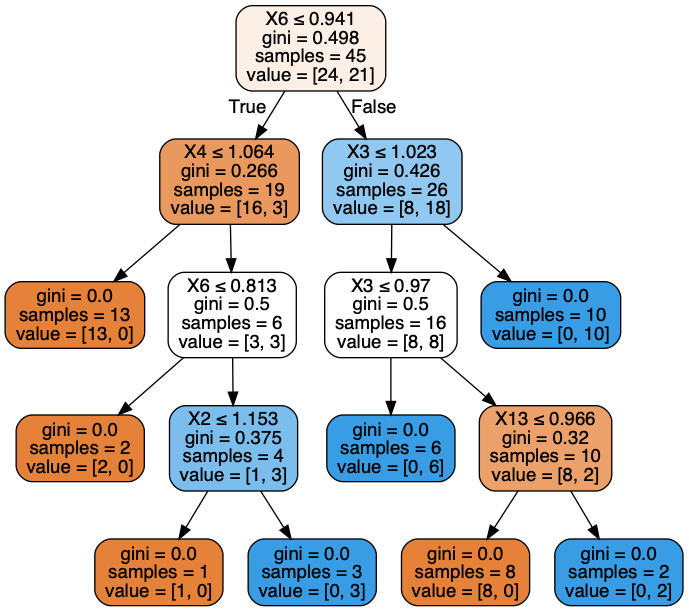

In [16]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
predicted = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(predicted, y_test):.3f}")

Accuracy: 0.833


In [19]:
kwargs_regularize = dict(min_samples_split=10)
dt = tree.DecisionTreeClassifier(**kwargs_regularize)
dt.fit(X_train, y_train)
predicted = dt.predict(X_test)
print(f"Accuracy: {accuracy_score(predicted, y_test):.3f}")

Accuracy: 0.833


In [20]:
n_nodes = dt.tree_.node_count
n_nodes

11

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:

clf = RandomForestClassifier()
clf.fit(X, y)

/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [23]:
predicted = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(predicted, y_test):.3f}")

Accuracy: 1.000


In [26]:
clf.feature_importances_

array([0.04514516, 0.01676678, 0.00586837, 0.0791495 , 0.14351628,
       0.06432808, 0.06596604, 0.0419787 , 0.14222293, 0.04278663,
       0.02977459, 0.11285057, 0.08276778, 0.12687859])

In [34]:
importance = list(clf.feature_importances_)
features = list(df.columns[:-1])
for i in range(len(features)):
    print(features[i] + ": " + str(importance[i]))

STATE: 0.04514516096923179
RACE: 0.01676677577741407
S1_DEM_RATIO: 0.005868370759675107
S2_DEM_RATIO: 0.07914950089611918
S3_DEM_RATIO: 0.1435162801293402
S1_REP_RATIO: 0.06432808189689312
S2_REP_RATIO: 0.06596603828444991
S3_REP_RATIO: 0.0419787023733572
S1_COR(DD): 0.14222292747252702
S2_COR(DD): 0.04278663267193016
S3_COR(DD): 0.029774592421379226
S1_COR(RR): 0.11285057034214903
S2_COR(RR): 0.08276777776638675
S3_COR(RR): 0.12687858823914727


If I was to drop the features that have the lowest importance, it would increase the bias but decrease the varaince. Would make it more generalizable, so we should potentially consider dropping those.